# The Sparks Foundation

## Graduate Rotational Internship Program

## ***Data Science & Business Analytics***

## Exploratory Data Analysis - Retail

### Problem Statement

● Perform **‘Exploratory Data Analysis’** on dataset **‘SampleSuperstore’**

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

● You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel/SAP/SAS)

● Dataset: https://bit.ly/3i4rbWl

## Author: Nitesh Ranjan Singh

In [1]:
# import all important libraries

import pandas as pd
import numpy as np


#### Read the Data

In [3]:
df=pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


####  Analyzing Individual Feature Patterns using Visualization

In [5]:
%%capture
! pip install seaborn

Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
# list the data types for each column
print(df.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
df['Country'].unique()

array(['United States'], dtype=object)

In [19]:
df=df.drop(columns='Country',axis=1)

In [20]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
#further looking at some more columns
print(df['Category'].value_counts())

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [22]:
print(df['Sub-Category'].value_counts())

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


#### Correlation Between Variables

In [24]:
correlation=df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


#### Heatmap Between correlated data 

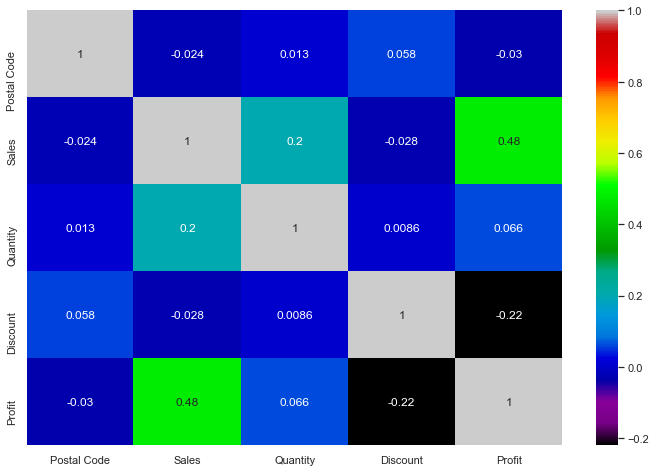

In [25]:
plt.figure(figsize=(12,8))
sns.set()
sns.heatmap(df.corr(),annot= True, cmap="nipy_spectral")
plt.show()

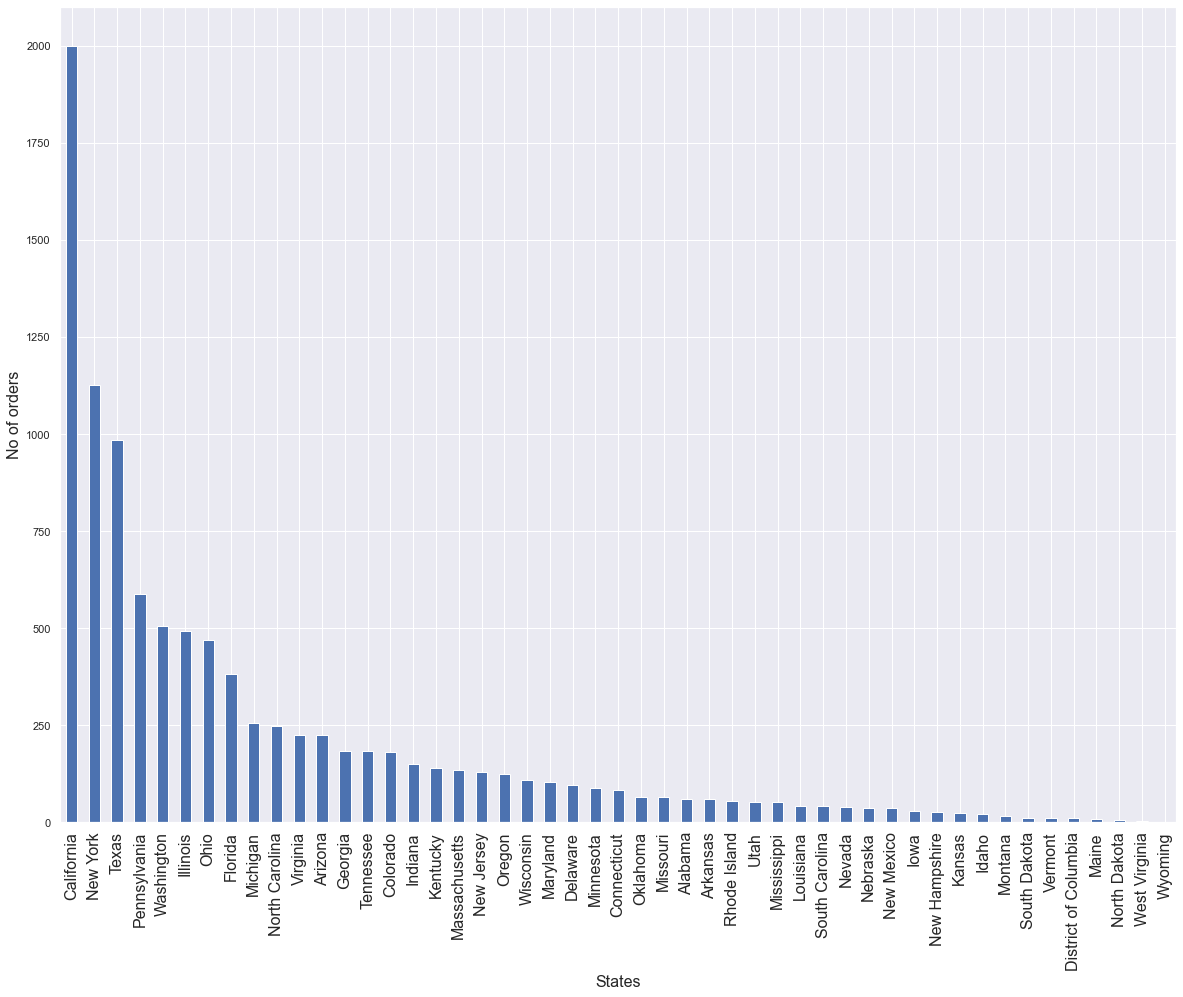

In [35]:
#Looking at total no orders from different states
plt.figure(figsize=(20,15))
df['State'].value_counts().plot.bar()
plt.xlabel("States",size=16)
plt.xticks(size=16)
plt.ylabel("No of orders",size=16)
plt.show()

#### Categorical variables

#### Let's look at the relationship between "ship mode" and "Profit".

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

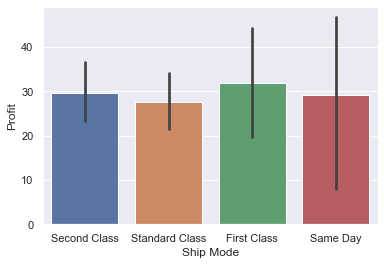

In [26]:
sns.barplot(x='Ship Mode',y='Profit',data=df)

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

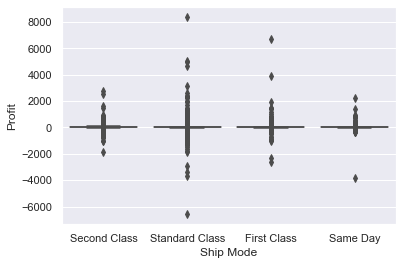

In [27]:
sns.boxplot(x='Ship Mode',y='Profit',data=df)

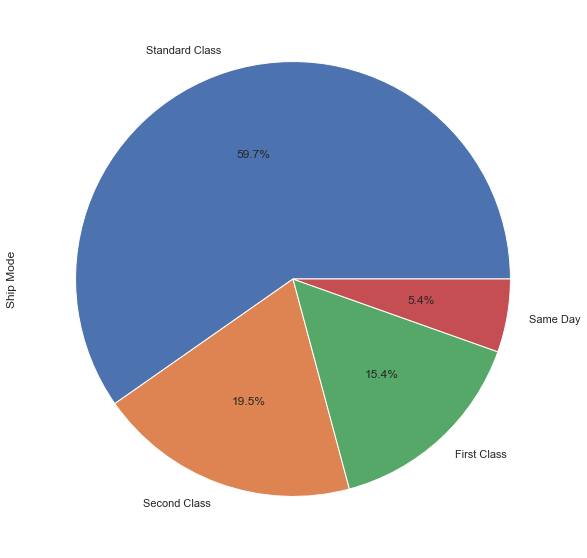

In [30]:
#Percentage of different shipping modes in our dataset 
plt.figure(figsize=(10,10))
df['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Let's look at the relationship between "Segment" and "Profit".

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

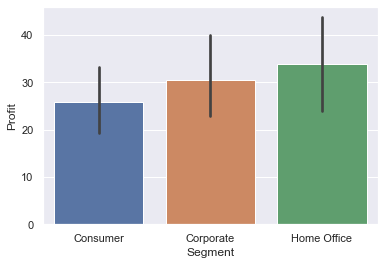

In [28]:
sns.barplot(x='Segment',y='Profit',data=df)

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

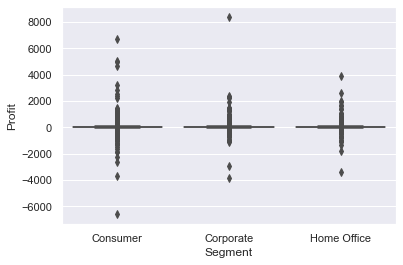

In [29]:
sns.boxplot(x='Segment',y='Profit',data=df)

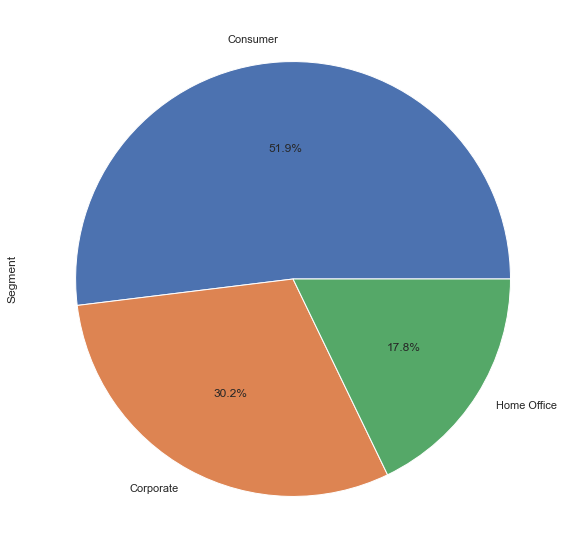

In [31]:
#Percentage of different Segment in our dataset 
plt.figure(figsize=(10,10))
df['Segment'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Let's look at the relationship between "Region" and "Profit".

<AxesSubplot:xlabel='Region', ylabel='Profit'>

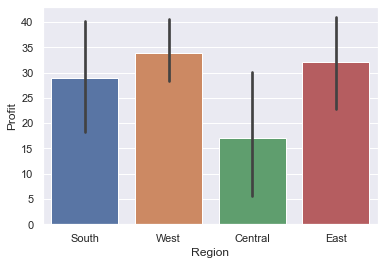

In [32]:
sns.barplot(x='Region',y='Profit',data=df)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

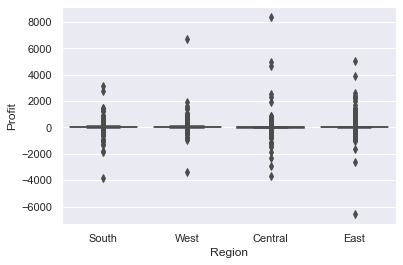

In [33]:
sns.boxplot(x='Region',y='Profit',data=df)

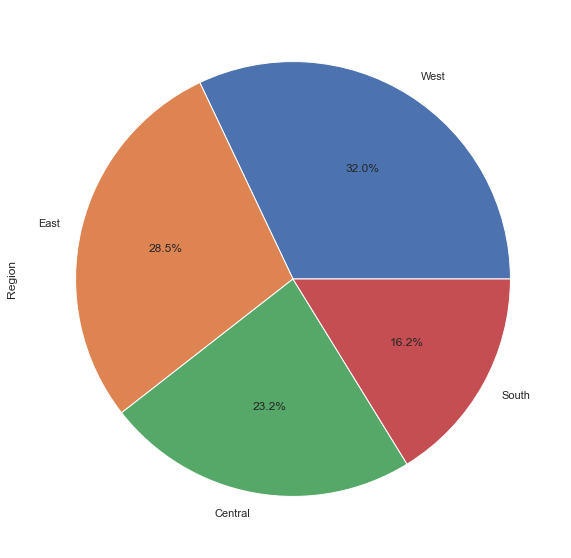

In [34]:
#Percentage of different Region in our dataset 
plt.figure(figsize=(10,10))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Let's look at the relationship between "Sub category" and "Profit".

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

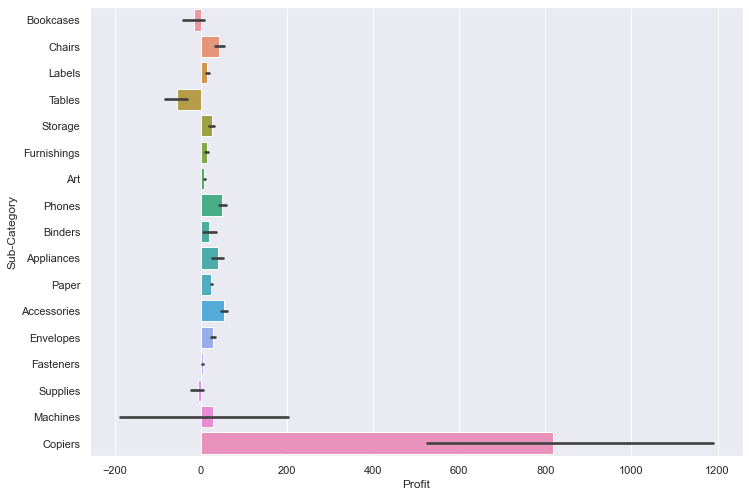

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y='Sub-Category',x='Profit',data=df)

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

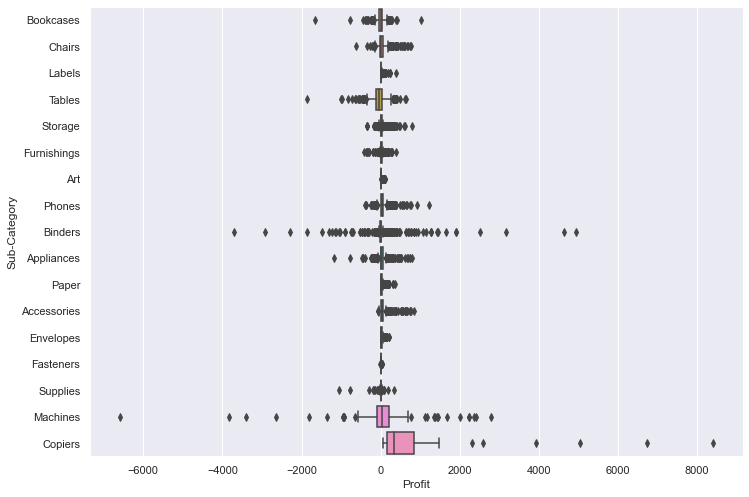

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y='Sub-Category',x='Profit',data=df)

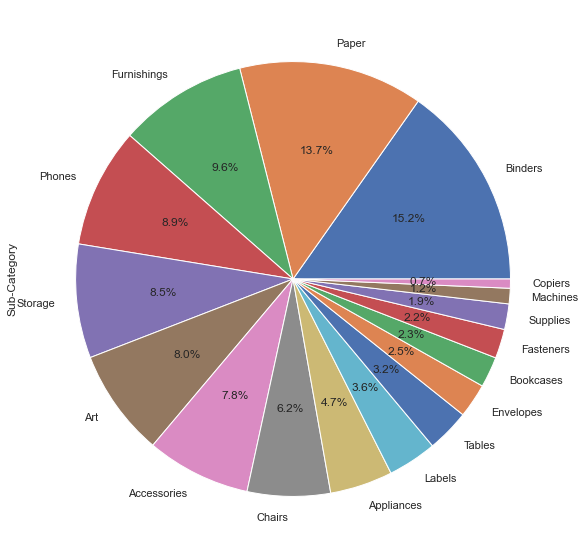

In [40]:
#percentage of orders of different sub categories
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

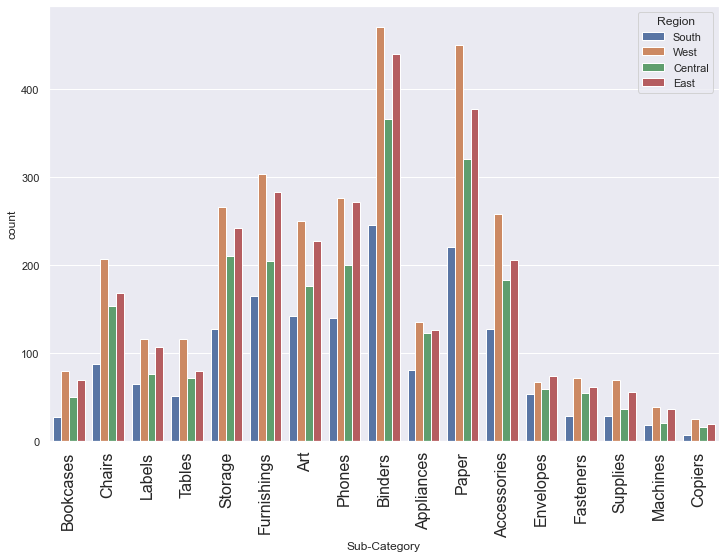

In [41]:
#Region wise different sub-categories order count
plt.figure(figsize=(12,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.xticks(rotation="vertical",size=16)
plt.show()

In [42]:
#Total sales sub-category wise
sales=pd.DataFrame(df.groupby('Sub-Category').sum()["Sales"])
print(sales)

                    Sales
Sub-Category             
Accessories   167380.3180
Appliances    107532.1610
Art            27118.7920
Binders       203412.7330
Bookcases     114879.9963
Chairs        328449.1030
Copiers       149528.0300
Envelopes      16476.4020
Fasteners       3024.2800
Furnishings    91705.1640
Labels         12486.3120
Machines      189238.6310
Paper          78479.2060
Phones        330007.0540
Storage       223843.6080
Supplies       46673.5380
Tables        206965.5320


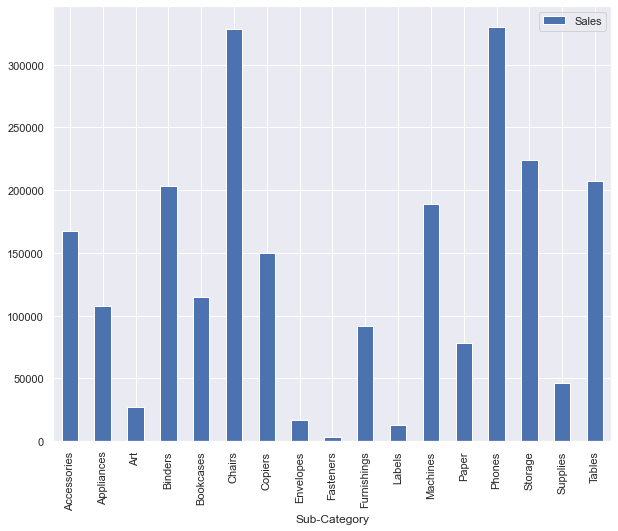

In [43]:
sales.plot.bar(figsize=(10,8),grid=True)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

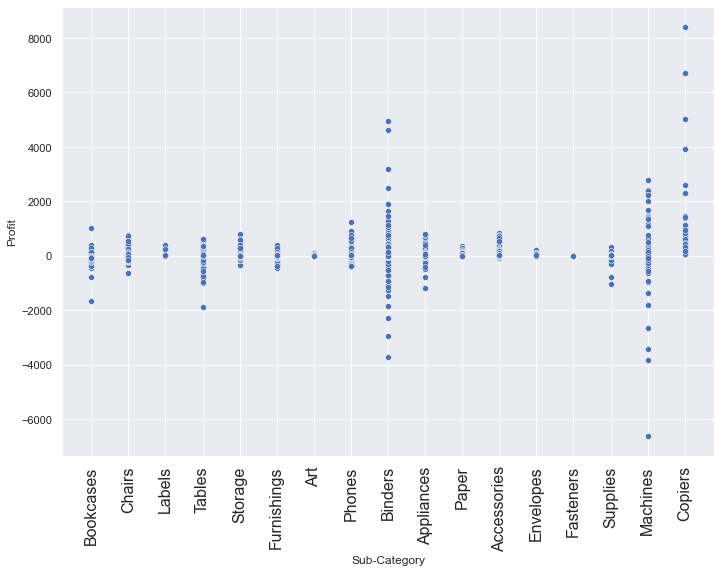

In [48]:
#Lets see how profits are distributed sub-category wise
sns.scatterplot(x='Sub-Category',y='Profit',data=df)
plt.xticks(rotation="vertical",size=16)

In [49]:
#Total profit sub-category wise
profit=pd.DataFrame(df.groupby('Sub-Category').sum()["Profit"])
print(profit)

                  Profit
Sub-Category            
Accessories   41936.6357
Appliances    18138.0054
Art            6527.7870
Binders       30221.7633
Bookcases     -3472.5560
Chairs        26590.1663
Copiers       55617.8249
Envelopes      6964.1767
Fasteners       949.5182
Furnishings   13059.1436
Labels         5546.2540
Machines       3384.7569
Paper         34053.5693
Phones        44515.7306
Storage       21278.8264
Supplies      -1189.0995
Tables       -17725.4811


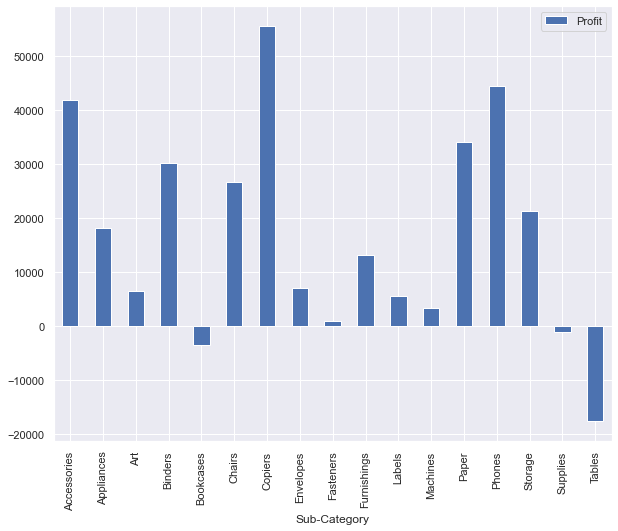

In [50]:
profit.plot.bar(figsize=(10,8),grid=True)
plt.show()

In [52]:
#top 10 sub-categories with less profit
profit=profit.sort_values('Profit',ascending=True)
print(profit[:10])

                  Profit
Sub-Category            
Tables       -17725.4811
Bookcases     -3472.5560
Supplies      -1189.0995
Fasteners       949.5182
Machines       3384.7569
Labels         5546.2540
Art            6527.7870
Envelopes      6964.1767
Furnishings   13059.1436
Appliances    18138.0054


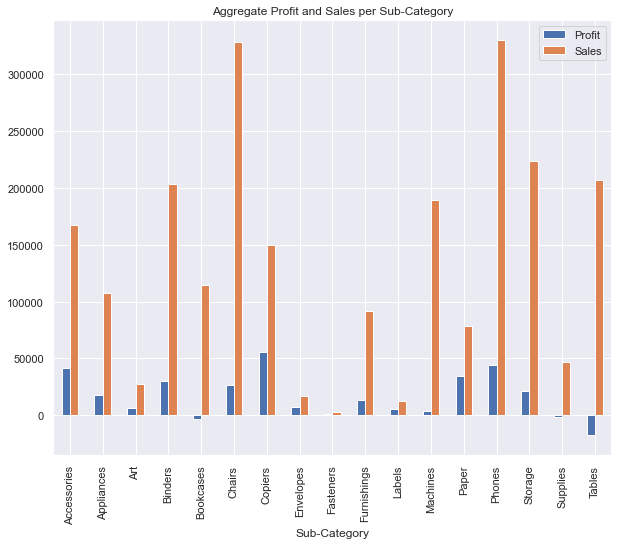

In [53]:
# Now comparing sales and profit side by side for a better understanding
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(figsize=(10,8))
plt.title('Aggregate Profit and Sales per Sub-Category')
plt.show()

In [54]:
#top 10 states giving less profit
state_profit=pd.DataFrame(df.groupby('State').sum()["Profit"])
print(state_profit.sort_values('Profit',ascending=True)[:10])

                    Profit
State                     
Texas          -25729.3563
Ohio           -16971.3766
Pennsylvania   -15559.9603
Illinois       -12607.8870
North Carolina  -7490.9122
Colorado        -6527.8579
Tennessee       -5341.6936
Arizona         -3427.9246
Florida         -3399.3017
Oregon          -1190.4705


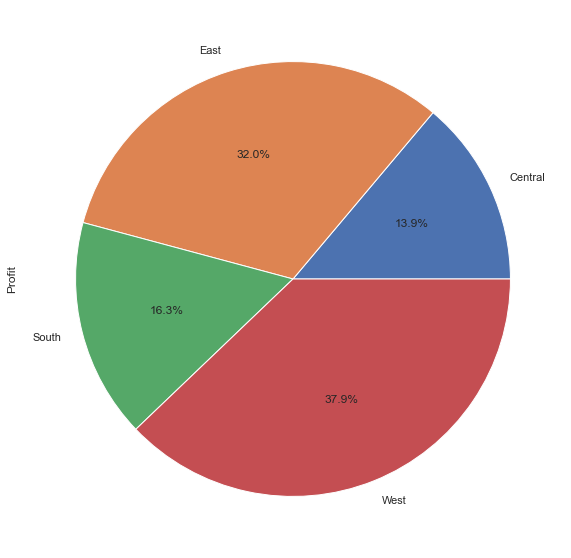

In [55]:
# Also lets look at our profit percentage region wise
plt.figure(figsize=(10,10))
df.groupby("Region").sum()["Profit"].plot.pie(autopct="%1.1f%%")
plt.show()